In [129]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy.signal import butter, filtfilt, hilbert

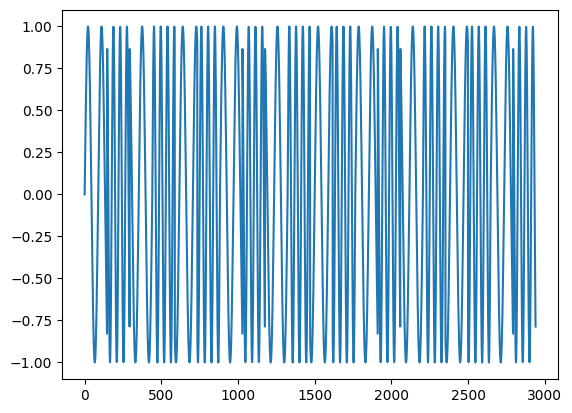

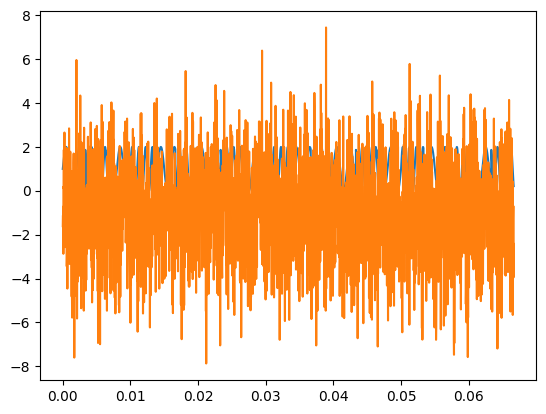

SNR 0.6


In [130]:
import numpy as np
import random
import matplotlib.pyplot as plt


noise_mult = 2
signal_mult = 1.2
sampling_rate = 44100
baud_rate = 300
samples_per_bit = 1.0 / baud_rate * sampling_rate

# tones representing bits, dummy data (0,1)
bits_in_tones = [500, 1000] * 10
#random.shuffle(bits_in_tones)
bit_arr = np.array(bits_in_tones)

symbols_freqs = np.repeat(bit_arr, samples_per_bit)

t = np.arange(0, len(symbols_freqs) / sampling_rate, 1.0 / sampling_rate)

noise = np.random.randn(t.shape[0]) * noise_mult
signal = np.sin(2.0 * np.pi * symbols_freqs * (t))


plt.plot(signal)
plt.show()

# New lines here demonstrating continuous phase FSK (CPFSK)
delta_phi = symbols_freqs * np.pi / (sampling_rate / 2.0)
phi = np.cumsum(delta_phi)
signal2 = np.sin(phi) * signal_mult + noise

plt.plot(t, signal+1.0)
plt.plot(t, signal2-1.0)
plt.show()
print("SNR",signal_mult/noise_mult)

In [131]:
# Filter parameters
cutoff_freq = 1000  # Cutoff frequency in Hz
fs = sampling_rate  # Sampling rate in Hz
order = 4  # Filter order

# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
d, c = butter(order, normal_cutoff, btype='lowpass')  # <-- modify here

b, a = butter(order, normal_cutoff, btype='highpass')  # <-- modify here

# Apply the filter
filtered_data1 = filtfilt(d, c, signal2)
filtered_data = filtfilt(b, a, filtered_data1)

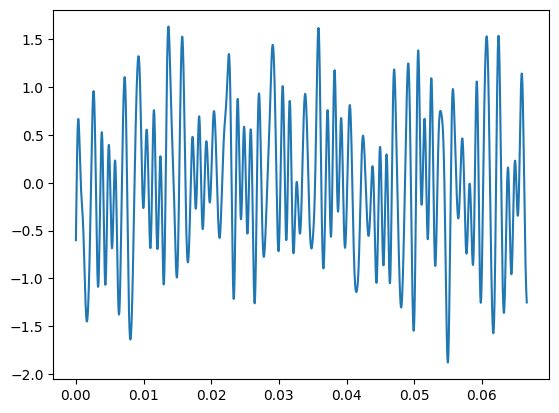

In [132]:
plt.plot(t, filtered_data1)
plt.show()

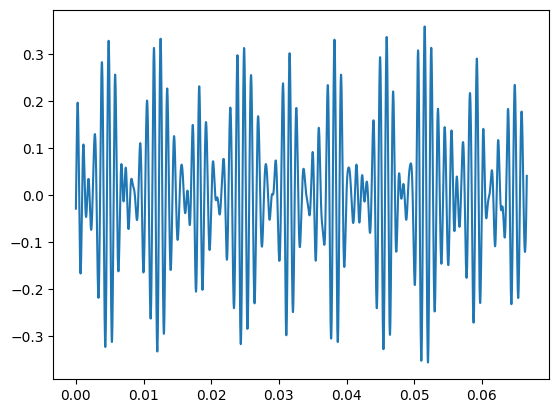

In [133]:
plt.plot(t, filtered_data)
plt.show()

In [134]:
envelope = abs(hilbert(filtered_data)) * 3

bits_high = envelope > 0.5
bits_low = envelope < -0.5
bits = np.logical_or(bits_high, bits_low)

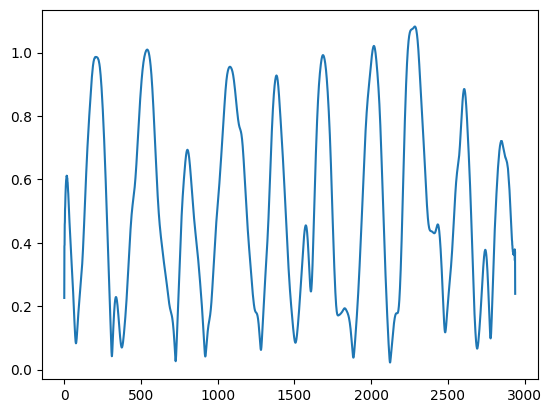

In [135]:
plt.plot(envelope)
plt.show()

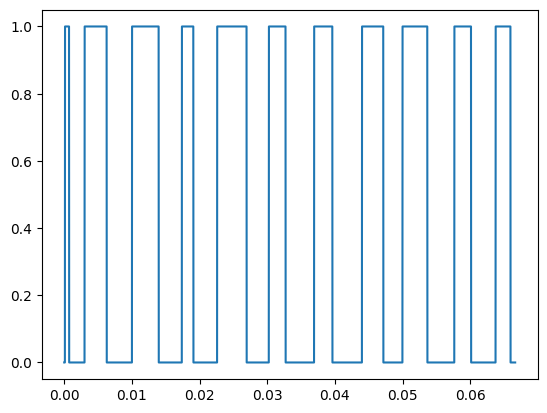

In [136]:
plt.plot(t,bits)
plt.show()